# World Happiness Report #

### Group Number #8

Group Members: Kfir Diamond, Lihi Noy, Gal Peleg & Mika Rosenboum

## About:

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
happy_df = pd.read_csv('World Happiness Report.csv')

import sklearn as sk
from sklearn.linear_model import LinearRegression

import plotly.express as px
import plotly.offline as py
py.init_notebook_mode(connected=True)
from PIL import Image
from io import BytesIO

In [2]:
happy_df.head()

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440


# Heatmap

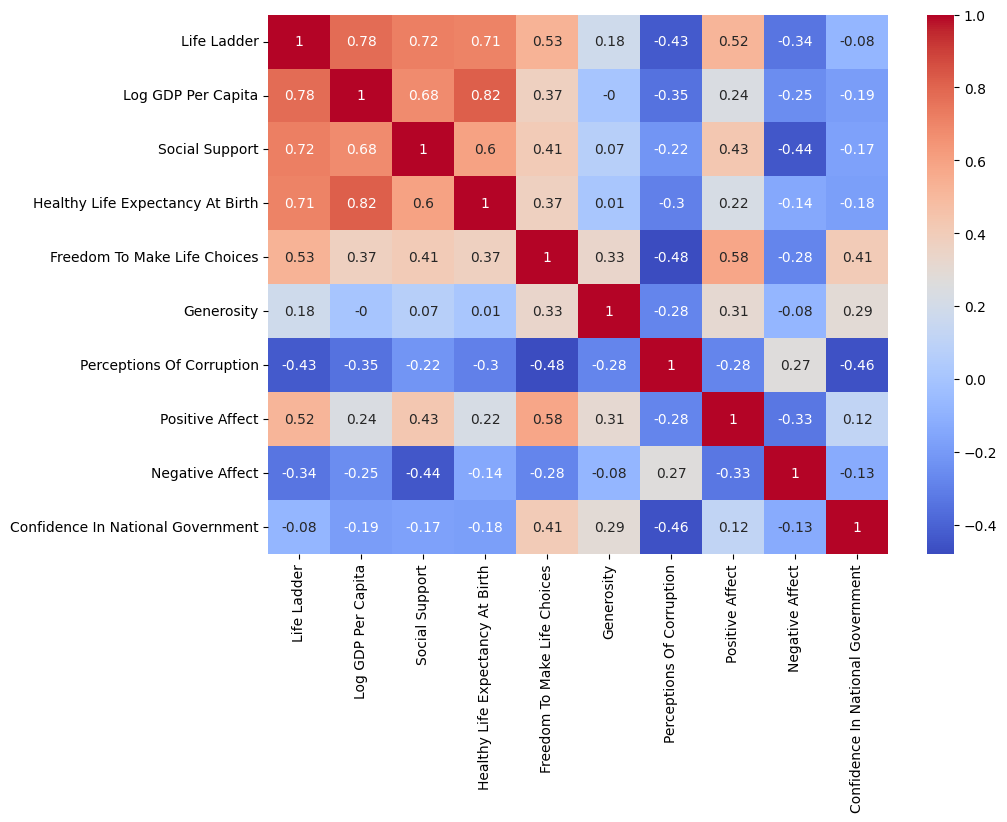

In [3]:
my_cols = ['Life Ladder', 
       'Log GDP Per Capita', 'Social Support',
       'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices',
       'Generosity', 'Perceptions Of Corruption', 'Positive Affect',
       'Negative Affect', 'Confidence In National Government']
plt.figure(figsize=(10,7))
my_cor = happy_df[my_cols].corr().round(2)
sns.heatmap(data=my_cor, cmap='coolwarm', annot=True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

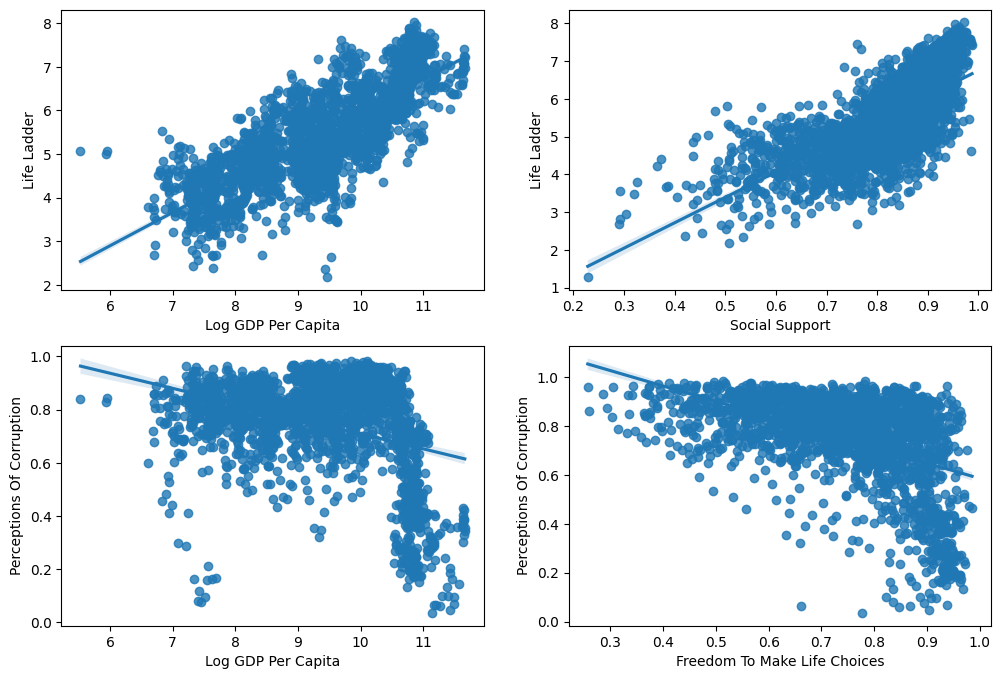

In [4]:
fig, ax = plt.subplots(2,2, figsize = (12,8))
sns.regplot(data=happy_df, x='Log GDP Per Capita', y='Life Ladder', ax=ax[0,0])
sns.regplot(data=happy_df, x='Social Support', y='Life Ladder', ax=ax[0,1])
sns.regplot(data=happy_df, x='Log GDP Per Capita', y='Perceptions Of Corruption', ax=ax[1,0])
sns.regplot(data=happy_df, x='Freedom To Make Life Choices', y='Perceptions Of Corruption', ax=ax[1,1])

plt.show

# Neighborhood

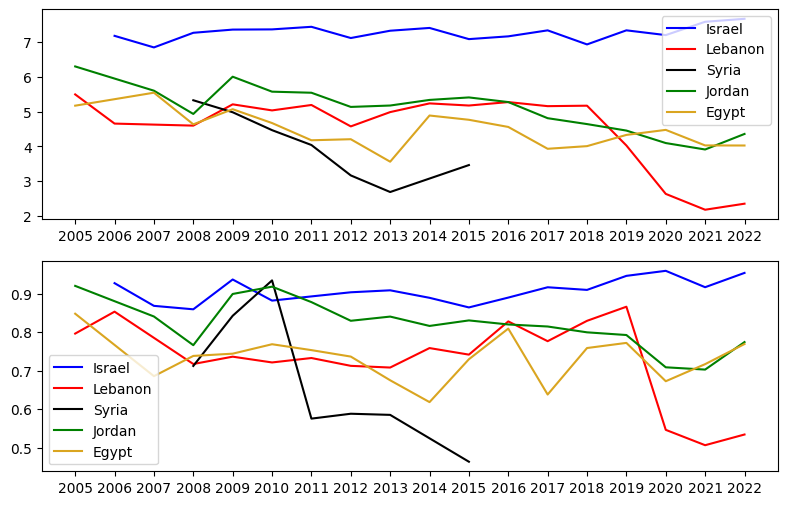

In [5]:
israel_df = happy_df[happy_df['Country Name']=='Israel']
lebanon_df = happy_df[happy_df['Country Name']=='Lebanon']
syria_df = happy_df[happy_df['Country Name']=='Syria']
jordan_df = happy_df[happy_df['Country Name']=='Jordan']
egypt_df = happy_df[happy_df['Country Name']=='Egypt']

fig, axes = plt.subplots(2, 1, figsize=(9.5, 6))

axes[0].plot(israel_df['Year'], israel_df['Life Ladder'], label='Israel', color='blue')
axes[0].plot(lebanon_df['Year'], lebanon_df['Life Ladder'], label='Lebanon', color='red')
axes[0].plot(syria_df['Year'], syria_df['Life Ladder'], label='Syria', color='black')
axes[0].plot(jordan_df['Year'], jordan_df['Life Ladder'], label='Jordan', color='green')
axes[0].plot(egypt_df['Year'], egypt_df['Life Ladder'], label='Egypt', color='goldenrod')
axes[0].set_xticks(np.arange(2005, 2023, 1))
axes[0].legend()

axes[1].plot(israel_df['Year'], israel_df['Social Support'], label='Israel', color='blue')
axes[1].plot(lebanon_df['Year'], lebanon_df['Social Support'], label='Lebanon', color='red')
axes[1].plot(syria_df['Year'], syria_df['Social Support'], label='Syria', color='black')
axes[1].plot(jordan_df['Year'], jordan_df['Social Support'], label='Jordan', color='green')
axes[1].plot(egypt_df['Year'], egypt_df['Social Support'], label='Egypt', color='goldenrod')
axes[1].set_xticks(np.arange(2005, 2023, 1))
axes[1].legend()

plt.show()

# Top 10 

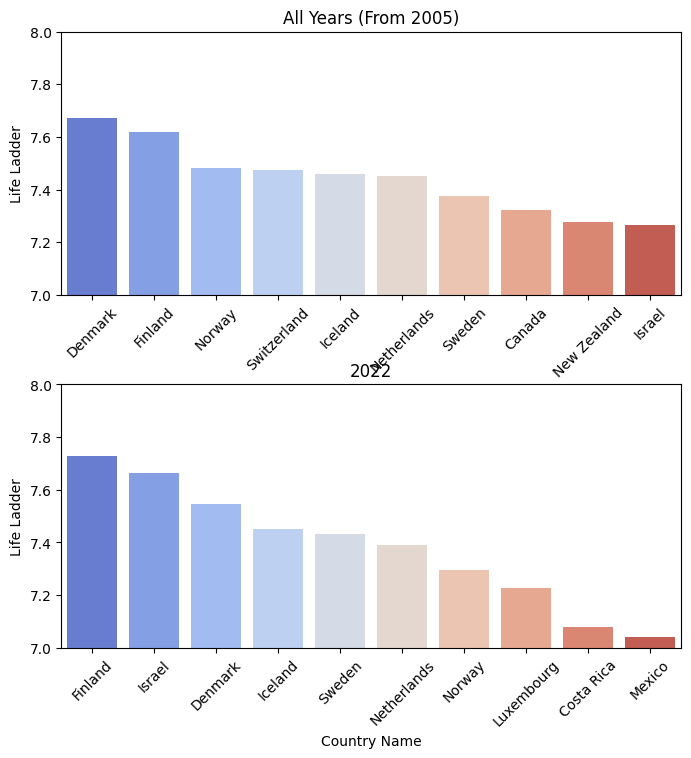

In [6]:
av_df = happy_df.groupby('Country Name')[['Life Ladder']].mean().sort_values('Life Ladder', ascending=False).reset_index()
df_2022 = happy_df[happy_df.Year==2022].sort_values('Life Ladder', ascending=False).reset_index()

fig, ax = plt.subplots(2,1, figsize = (8,8))
plt.subplots_adjust(hspace = 0.34)

sns.barplot(data=av_df.head(10), x='Country Name', y='Life Ladder', ax = ax[0], palette='coolwarm')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[0].set_ylim(7,8)
ax[0].set_title('All Years (From 2005)')
sns.barplot(data=df_2022.head(10), x='Country Name', y='Life Ladder', ax = ax[1], palette='coolwarm')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
ax[1].set_ylim(7,8)
ax[1].set_title('2022')
plt.show()


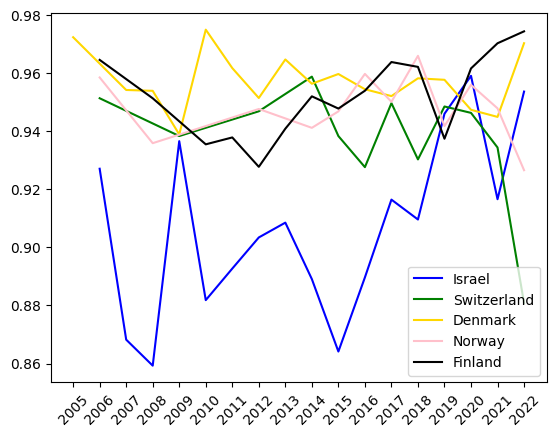

In [18]:
israel_df = happy_df[happy_df['Country Name']=='Israel']
switzerland_df = happy_df[happy_df['Country Name']=='Switzerland']
denmark_df = happy_df[happy_df['Country Name']=='Denmark']
norway_df = happy_df[happy_df['Country Name']=='Norway']
finland_df = happy_df[happy_df['Country Name']=='Finland']

plt.plot(israel_df['Year'], israel_df['Social Support'], label='Israel', color='blue')
plt.plot(switzerland_df['Year'], switzerland_df['Social Support'], label='Switzerland', color='green')
plt.plot(denmark_df['Year'], denmark_df['Social Support'], label='Denmark', color='gold')
plt.plot(norway_df['Year'], norway_df['Social Support'], label='Norway', color='pink')
plt.plot(finland_df['Year'], finland_df['Social Support'], label='Finland', color='black')

plt.xticks(np.arange(2005, 2023, 1), rotation=45)
plt.legend()
plt.show()

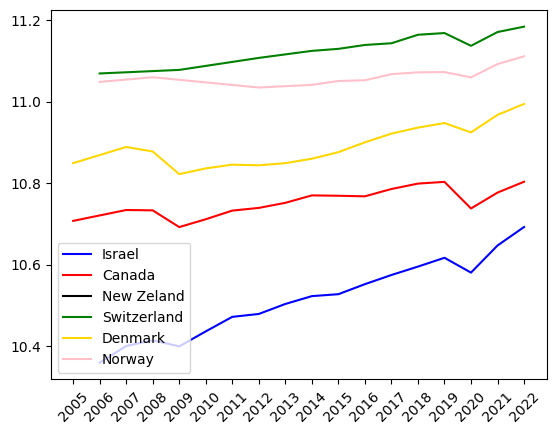

In [24]:
israel_df = happy_df[happy_df['Country Name']=='Israel']
canada_df = happy_df[happy_df['Country Name']=='Canada']
new_zeland_df = happy_df[happy_df['Country Name']=='New Zeland']
switzerland_df = happy_df[happy_df['Country Name']=='Switzerland']
denmark_df = happy_df[happy_df['Country Name']=='Denmark']
norway_df = happy_df[happy_df['Country Name']=='Norway']

plt.plot(israel_df['Year'], israel_df['Log GDP Per Capita'], label='Israel', color='blue')
plt.plot(canada_df['Year'], canada_df['Log GDP Per Capita'], label='Canada', color='red')
plt.plot(new_zeland_df['Year'], new_zeland_df['Log GDP Per Capita'], label='New Zeland', color='black')
plt.plot(switzerland_df['Year'], switzerland_df['Log GDP Per Capita'], label='Switzerland', color='green')
plt.plot(denmark_df['Year'], denmark_df['Log GDP Per Capita'], label='Denmark', color='gold')
plt.plot(norway_df['Year'], norway_df['Log GDP Per Capita'], label='Norway', color='pink')
plt.xticks(np.arange(2005, 2023, 1), rotation=45)
plt.legend()
plt.show()

# Happiness Prediction

In [9]:
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [10]:
features = ['Year', 'Log GDP Per Capita', 'Social Support',
       'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices',
       'Generosity', 'Perceptions Of Corruption', 'Positive Affect',
       'Negative Affect', 'Confidence In National Government']
happy2 = happy_df.dropna()
X = happy2[features]
y = happy2['Life Ladder']

In [11]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.1, random_state=1) 
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
prediction = reg_model.predict(X_test)
r2_score(y_test, prediction)

0.7998837727173462

In [12]:
feature_importances = pd.DataFrame(reg_model.coef_,
                                   index = features,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances

,importance
Positive Affect,1.970228
Social Support,1.728816
Freedom To Make Life Choices,0.871386
Generosity,0.480842
Log GDP Per Capita,0.344446
Negative Affect,0.137575
Healthy Life Expectancy At Birth,0.030792
Year,-0.013308
Confidence In National Government,-0.610034
Perceptions Of Corruption,-1.088439


In [13]:
import plotly.express as px
import plotly.offline as py
py.init_notebook_mode(connected=True)
from PIL import Image
from io import BytesIO

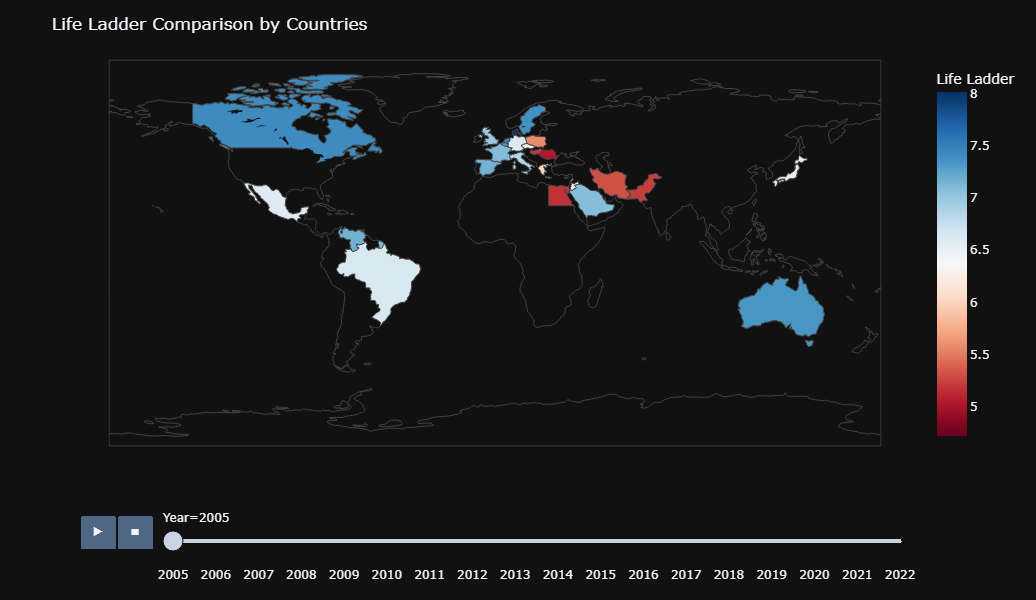

In [14]:
fig = px.choropleth(happy_df.sort_values("Year"), 
                    locations = "Country Name",
                    color = "Life Ladder",
                    locationmode = "country names",
                    template = "plotly_dark",
                     color_continuous_scale= 'RdBu',
                    animation_frame = "Year")
fig.update_layout(title = "Life Ladder Comparison by Countries", height=600, width=800)
fig.show()

In [15]:
happy_df['Regional Indicator'].unique()

array(['South Asia', 'Central and Eastern Europe',
       'Middle East and North Africa', nan, 'Latin America and Caribbean',
       'Commonwealth of Independent States', 'North America and ANZ',
       'Western Europe', 'Sub-Saharan Africa', 'Southeast Asia',
       'East Asia'], dtype=object)

In [16]:
happy_df2 = happy_df.copy()
happy_df2 = happy_df2.replace(['South Asia', 'Central and Eastern Europe',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Commonwealth of Independent States', 'North America and ANZ',
       'Western Europe', 'Southeast Asia',
       'East Asia'], 'Else')
happy_df2[happy_df2['Country Name']=='Israel']=happy_df2[happy_df2['Country Name']=='Israel'].replace('Else','Israel')

(45.0, 76.4924983935)

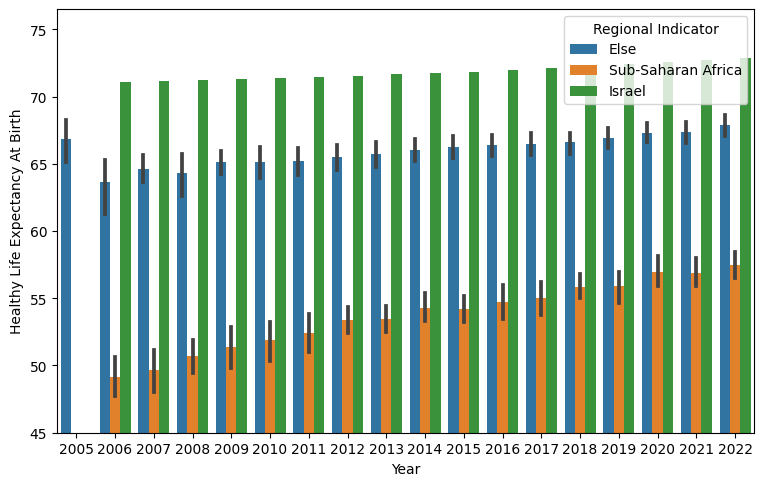

In [23]:
plt.figure(figsize=(9,5.5))
ax = sns.barplot(data=happy_df2, x='Year', y='Healthy Life Expectancy At Birth', hue='Regional Indicator')
ax.set_ylim(45, ax.get_ylim()[1])